In [0]:
import os
os.chdir('/content/drive/My Drive/kaggle_study/dacon_corona/coronadataset0430')

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 데이터 준비 
사용하는 데이터 : case, patientInfo, patientRoute


In [0]:
case = pd.read_csv('Case.csv')
print(case.shape)
case.head()

(112, 8)


,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,98,37.508163,126.884387
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,20,37.592888,127.056766
2,1000003,Seoul,Guro-gu,True,Manmin Central Church,41,37.481059,126.894343
3,1000004,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
4,1000005,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403


In [0]:
p_info = pd.read_csv('PatientInfo.csv')
print(p_info.shape)
p_info.tail()


(3388, 18)


,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
3383,7000000009,9651.0,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated
3384,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3385,7000000011,NaN,male,NaN,30s,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7.000000e+09,5.0,NaN,2020-04-03,NaN,NaN,isolated
3386,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9.0,NaN,2020-04-03,NaN,NaN,isolated
3387,7000000013,NaN,female,NaN,10s,China,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,6.0,NaN,2020-04-14,NaN,NaN,isolated


## 해외유입자 중 확진자

In [0]:
case[case.infection_case=='overseas inflow']

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
8,1000009,Seoul,-,False,overseas inflow,313,-,-
17,1100007,Busan,-,False,overseas inflow,21,-,-
26,1200007,Daegu,-,False,overseas inflow,21,-,-
30,1300002,Gwangju,-,False,overseas inflow,20,-,-
35,1400003,Incheon,-,False,overseas inflow,47,-,-
41,1500004,Daejeon,-,False,overseas inflow,9,-,-
45,1600002,Ulsan,-,False,overseas inflow,15,-,-
51,1700004,Sejong,-,False,overseas inflow,3,-,-
60,2000007,Gyeonggi-do,-,False,overseas inflow,213,-,-
66,3000004,Gangwon-do,-,False,overseas inflow,14,-,-


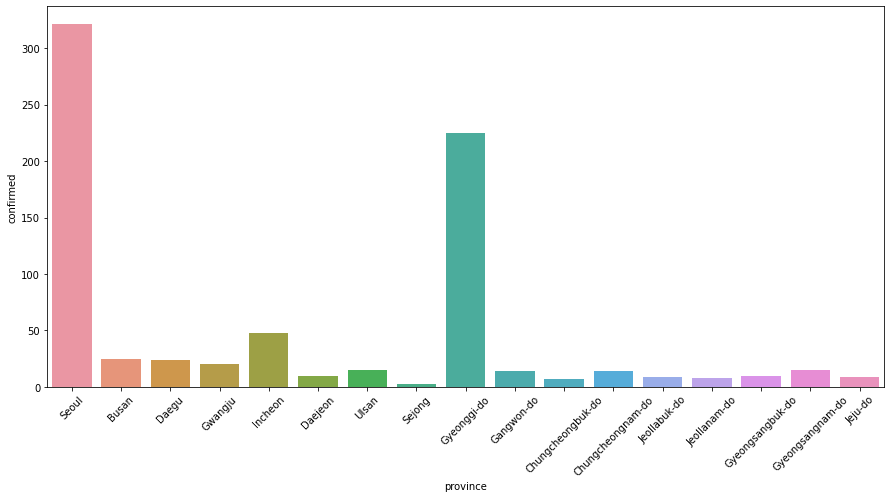

In [0]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=45)
sns.barplot(data= case[case.infection_case=='overseas inflow'],x= 'province',y='confirmed')

- 해외 유입된 확진자는 서울거주자가 가장 많다
- 외국인도 서울에 거주하면 서울거주자로 포함된다
- 남부쪽은 해외 입국자들에 의한 감염은 많이 발생하진 않은것 같다


## 해외 유입된 환자 거주지역

In [0]:
p_os = p_info[p_info.infection_case=='overseas inflow']

In [0]:
p_os.province.value_counts()

Seoul                249
Gyeonggi-do          144
Incheon               38
Busan                 25
Gyeongsangnam-do      15
Gwangju               14
Gyeongsangbuk-do      13
Ulsan                 11
Chungcheongnam-do     11
Daejeon                9
Jeju-do                8
Gangwon-do             8
Jeollabuk-do           8
Jeollanam-do           7
Chungcheongbuk-do      4
Sejong                 3
Name: province, dtype: int64

In [0]:
p_os

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
7,1000000008,13.0,male,1992.0,20s,Korea,Seoul,etc,NaN,overseas inflow,1.0,NaN,0.0,NaN,2020-02-02,2020-02-24,NaN,released
8,1000000009,19.0,male,1983.0,30s,Korea,Seoul,Songpa-gu,NaN,overseas inflow,2.0,NaN,68.0,NaN,2020-02-05,2020-02-21,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3320,7000000008,9457.0,female,NaN,10s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,25.0,NaN,2020-03-27,2020-04-12,NaN,released
3321,7000000009,9651.0,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated
3322,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3324,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9.0,NaN,2020-04-03,NaN,NaN,isolated


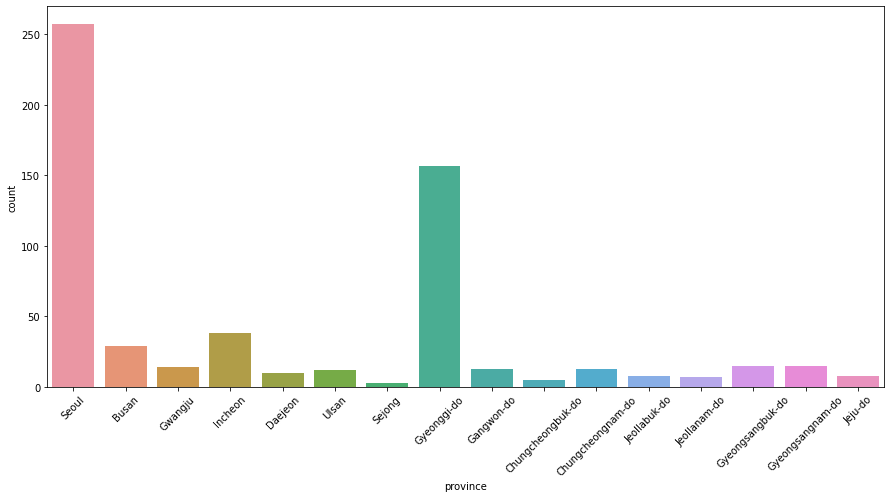

In [0]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=45)
sns.countplot(data = p_os,x= p_os.province)

- 해외 유입된 환자도 당연히 서울이 가장 많다

In [0]:
p_os.country.value_counts()

Korea            584
China              6
United States      6
Germany            1
Thailand           1
Indonesia          1
Switzerland        1
Spain              1
Vietnam            1
France             1
Canada             1
Name: country, dtype: int64

## 입국자 국적

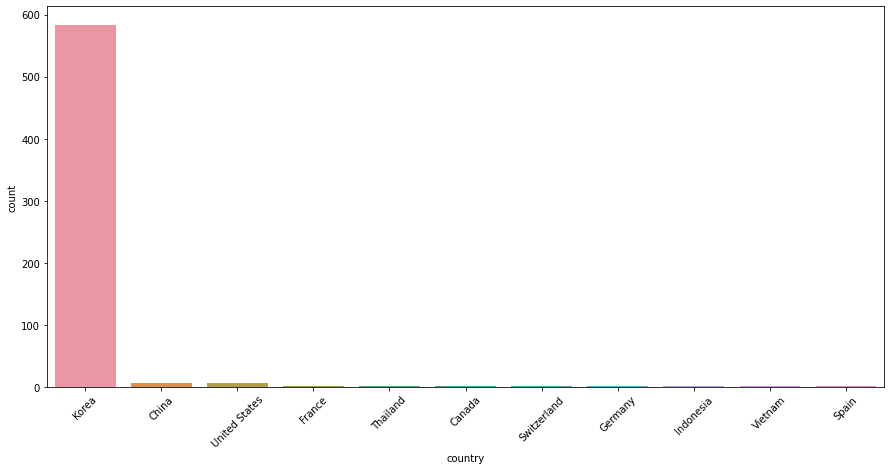

In [0]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=45)
sns.countplot(data = p_os,x= p_os.country)

- 해외 유입된 환자는 대다수 한국인

## 입국자 거주지역별 접촉한 사람수 

In [0]:
p_os[['contact_number']].groupby(p_os.province).mean()

,contact_number
province,
Busan,4.615385
Chungcheongbuk-do,NaN
Chungcheongnam-do,2.000000
Daejeon,2.600000
Gangwon-do,0.750000
Gwangju,51.300000
Gyeonggi-do,15.514286
Gyeongsangbuk-do,NaN
Gyeongsangnam-do,NaN


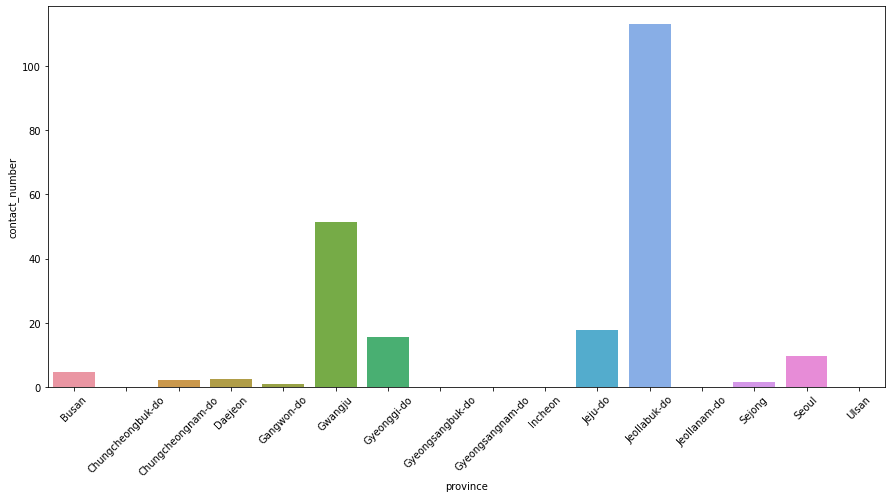

In [0]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=45)
sns.barplot(data=p_os[['contact_number']].groupby(p_os.province).mean(),x=p_os[['contact_number']].groupby(p_os.province).mean().index,y='contact_number')

- 전라북도 거주자들이 평균적으로 가장 활발하게 사람들과 접촉했다
- 특별입국절차를 거친 입국자들인지를 파악해야함


In [0]:
contact_person= p_os[p_os.contact_number.notnull()]

In [0]:
contact_person.sort_values('contact_number',ascending=False,inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
contact_person

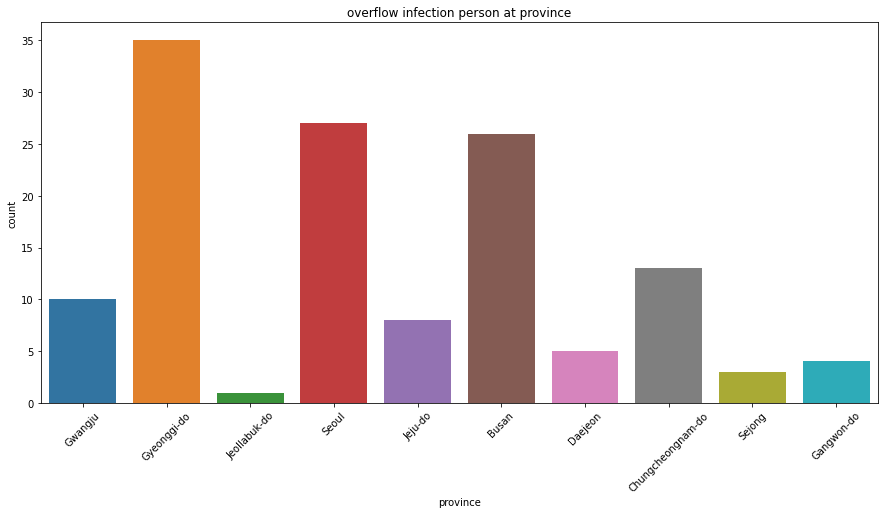

In [0]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=45)
plt.title('overflow infection person at province')
sns.countplot(data= contact_person,x='province')

- 해외 감염 입국자 중, 국내 사람들과 접촉한 입국자는 경기도 거주자가 가장 많다 

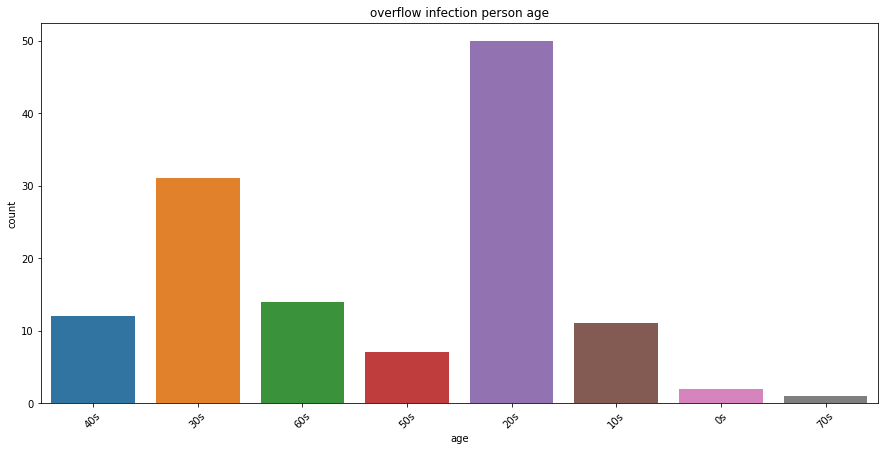

In [0]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=45)
plt.title('overflow infection person age')
sns.countplot(data= contact_person,x='age')

- 해외 감염 입국자 중, 국내 사람들과 접촉한 입국자는 20대가 많다. 

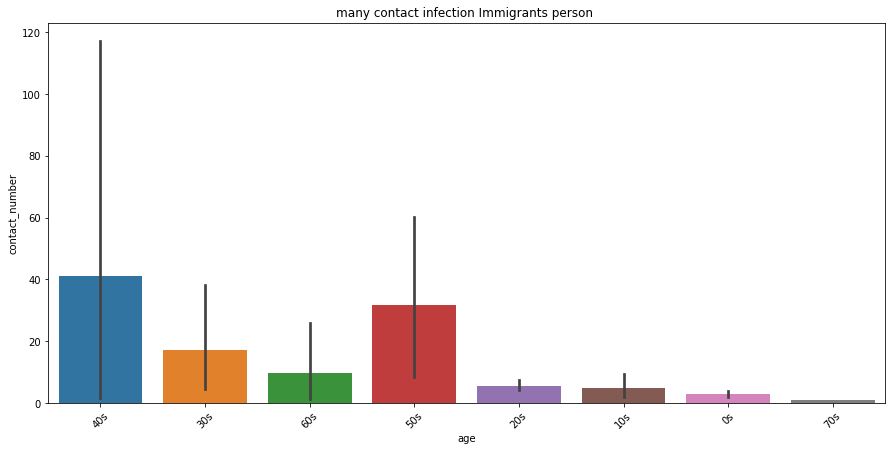

In [0]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=45)
plt.title('many contact infection Immigrants person ')
sns.barplot(data= contact_person,x='age',y='contact_number')

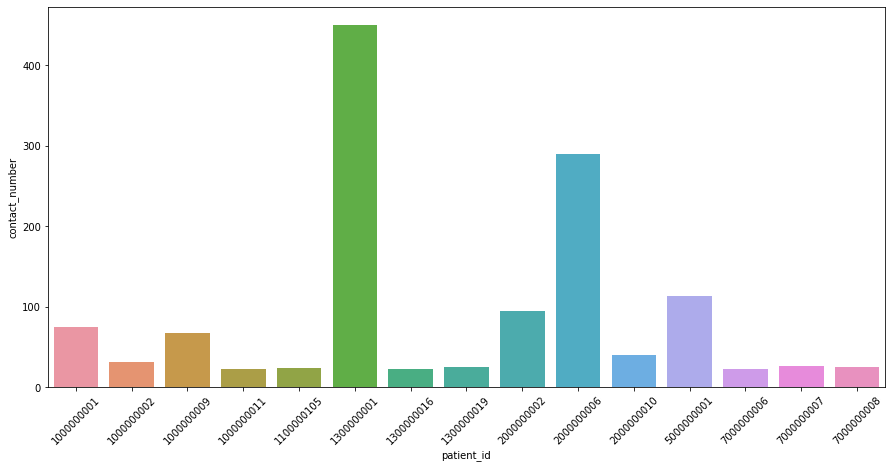

In [0]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=45)

sns.barplot(data= contact_person[:15],x='patient_id',y='contact_number')

- 사람들과 가장 많이 접촉했던 입국자의 id는 1300000001 이며 400명 넘게 접촉했다 

In [0]:
p_os[p_os.contact_number==450]

NameError: ignored

## 입국자 접촉에 의한 전염

In [0]:
contact_os = p_os[p_os.contact_number.notnull()]
# count_df = pd.DataFrame
count = [0]*len(contact_os)

contact_df = pd.DataFrame(count,columns=['order'])
def recurrent_contact(contact_os,contact_df,j):
    
    contact_df2 = pd.DataFrame()
    
    for i in contact_os.patient_id:

        a= p_info[p_info.infected_by==i]
        a['order'] = j
        contact_df2 = pd.concat([contact_df2,a])
    
    contact_os = contact_df2[contact_df2.contact_number.notnull()]
    contact_df = pd.concat([contact_df,contact_df2])
    # print(len(contact_os))
    j+=1
    return recurrent_contact(contact_os,contact_df,j) if len(contact_os)!=2 else contact_df 
    

In [0]:
r_infection = recurrent_contact(contact_os,contact_df,1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [0]:
r_infection = r_infection[r_infection.patient_id.notnull()]

In [0]:
pd.concat([contact_os,r_infection])

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,order
0,1.000000e+09,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released,NaN
1,1.000000e+09,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released,NaN
3,1.000000e+09,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released,NaN
7,1.000000e+09,13.0,male,1992.0,20s,Korea,Seoul,etc,NaN,overseas inflow,1.0,NaN,0.0,NaN,2020-02-02,2020-02-24,NaN,released,NaN
8,1.000000e+09,19.0,male,1983.0,30s,Korea,Seoul,Songpa-gu,NaN,overseas inflow,2.0,NaN,68.0,NaN,2020-02-05,2020-02-21,NaN,released,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.000001e+09,10194.0,female,1970.0,50s,Korea,Seoul,Jungnang-gu,NaN,contact with patient,NaN,1.000001e+09,NaN,NaN,2020-04-04,NaN,NaN,isolated,1.0
1677,2.000001e+09,10444.0,male,1959.0,60s,Korea,Gyeonggi-do,Uijeongbu-si,NaN,contact with patient,NaN,1.000001e+09,NaN,NaN,2020-04-09,NaN,NaN,isolated,1.0
1678,2.000001e+09,10439.0,female,1961.0,60s,Korea,Gyeonggi-do,Uijeongbu-si,NaN,contact with patient,NaN,1.000001e+09,NaN,NaN,2020-04-09,NaN,NaN,isolated,1.0
1071,2.000000e+09,20.0,female,1978.0,40s,Korea,Gyeonggi-do,Suwon-si,NaN,contact with patient,3.0,2.000000e+09,2.0,2020-02-04,2020-02-05,2020-02-24,NaN,released,1.0


In [0]:
r_infection.drop_duplicates('patient_id',inplace=True)

In [0]:
r_infection.shape

(31, 19)

In [0]:
r_infection

,order,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
4,1,1.000000e+09,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released
402,1,1.000000e+09,9571.0,female,1980.0,30s,Korea,Seoul,Dongjak-gu,NaN,contact with patient,NaN,1.000000e+09,NaN,NaN,2020-03-28,NaN,NaN,released
482,1,1.000000e+09,9946.0,male,1982.0,30s,Korea,Seoul,Seocho-gu,NaN,contact with patient,NaN,1.000000e+09,NaN,2020-03-27,2020-04-01,NaN,NaN,isolated
512,1,1.000001e+09,10115.0,female,1955.0,60s,Korea,Seoul,Gangnam-gu,NaN,contact with patient,NaN,1.000000e+09,1.0,NaN,2020-04-03,NaN,NaN,isolated
559,1,1.000001e+09,10275.0,female,1954.0,60s,Korea,Seoul,Songpa-gu,NaN,contact with patient,NaN,1.000000e+09,NaN,2020-03-23,2020-04-05,NaN,NaN,isolated
619,1,1.000001e+09,10632.0,NaN,NaN,NaN,Korea,Seoul,Gangnam-gu,NaN,contact with patient,NaN,1.000001e+09,NaN,NaN,2020-04-16,NaN,NaN,isolated
532,1,1.000001e+09,10222.0,female,1994.0,20s,Korea,Seoul,Dongjak-gu,NaN,contact with patient,NaN,1.000001e+09,NaN,NaN,2020-04-03,NaN,NaN,released
612,1,1.000001e+09,10588.0,NaN,NaN,NaN,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,NaN,1.000001e+09,NaN,2020-04-12,2020-04-13,NaN,NaN,released
1708,1,2.000001e+09,10510.0,female,1994.0,20s,Korea,Gyeonggi-do,Hwaseong-si,NaN,contact with patient,NaN,1.000001e+09,NaN,NaN,2020-04-11,NaN,NaN,isolated
831,1,1.300000e+09,18.0,female,NaN,20s,Korea,Gwangju,NaN,NaN,contact with patient,NaN,1.300000e+09,8.0,NaN,2020-02-05,2020-02-20,NaN,released


In [0]:
a= r_infection[r_infection.infected_by==1000000005]
if a.empty:
    print('yes')
else:
    print('null')

yes


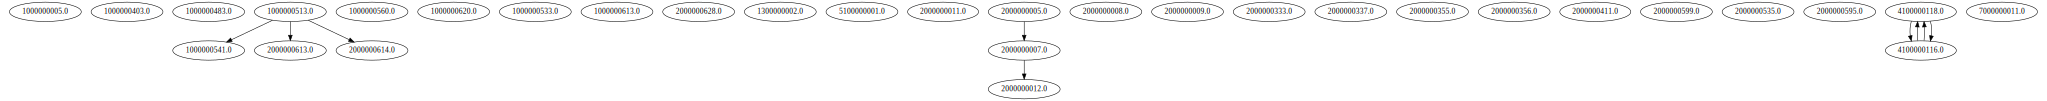

In [0]:
import graphviz

def save_graph_as_svg(dot_string, output_file_name):
    if type(dot_string) is str:
        g = graphviz.Source(dot_string)
    elif isinstance(dot_string, (graphviz.dot.Digraph, graphviz.dot.Graph)):
        g = dot_string
    # g.format='svg'
    # g.filename = output_file_name
    # g.directory = '../../assets/images/markdown_img/'
    # g.render(view=False)
    return g


digraph1 = graphviz.Digraph(comment="infection order")
first = r_infection[r_infection.order==1].patient_id

for i in first:
    digraph1.node(str(i))
    second= r_infection[r_infection.infected_by==i]
   
    if second.empty:
        pass
    else:
        for j in second.patient_id:
            digraph1.node(str(j))
            digraph1.edge(str(i),str(j))
            
            third= r_infection[r_infection.infected_by==j]
            
            if third.empty :
                pass
            
            else: 
                for k in third.patient_id:
                    digraph1.node(str(k))
                    digraph1.edge(str(j),str(k))

save_graph_as_svg(digraph1, 'round table')

In [0]:
policy = pd.read_csv('Policy.csv')
policy.shape

(48, 7)

In [0]:
policy

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN
5,6,Korea,Immigration,Special Immigration Procedure,from Hong Kong,2020-02-12,NaN
6,7,Korea,Immigration,Special Immigration Procedure,from Macau,2020-02-12,NaN
7,8,Korea,Immigration,Special Immigration Procedure,from Japan,2020-03-09,NaN
8,9,Korea,Immigration,Special Immigration Procedure,from Italy,2020-03-12,NaN
9,10,Korea,Immigration,Special Immigration Procedure,from Iran,2020-03-12,NaN


In [0]:
sip_pos= p_os[(p_os.confirmed_date>='2020-04-01')]

In [0]:
sip_pos

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
476,1000000477,9930.0,female,1988.0,30s,Korea,Seoul,Dongdaemun-gu,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-04-01,NaN,NaN,isolated
477,1000000478,9932.0,male,1972.0,40s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-04-01,NaN,NaN,released
478,1000000479,9950.0,male,1984.0,30s,Korea,Seoul,etc,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-04-01,NaN,NaN,released
479,1000000480,9963.0,female,1985.0,30s,Korea,Seoul,etc,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-04-01,NaN,NaN,released
480,1000000481,9951.0,female,2019.0,0s,Korea,Seoul,etc,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-04-01,NaN,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,6100000113,NaN,male,1990.0,30s,Korea,Gyeongsangnam-do,Geoje-si,NaN,overseas inflow,NaN,NaN,NaN,2020-03-29,2020-04-08,NaN,NaN,isolated
3372,6100000114,NaN,female,2018.0,0s,Korea,Gyeongsangnam-do,Jinju-si,NaN,overseas inflow,NaN,NaN,NaN,2020-04-01,2020-04-08,NaN,NaN,isolated
3384,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3386,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9.0,NaN,2020-04-03,NaN,NaN,isolated


In [0]:
contact0401 = sip_pos[sip_pos.contact_number.notnull()]

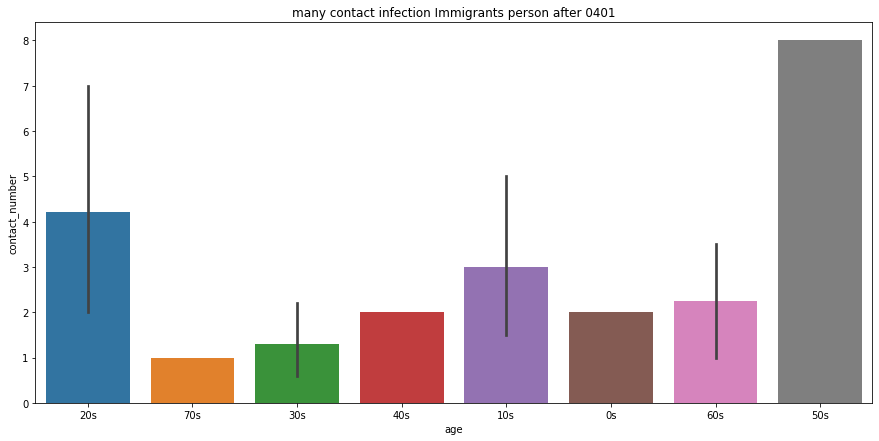

In [0]:
plt.figure(figsize=(15,7))
plt.title('many contact infection Immigrants person after 0401')
sns.barplot(data = contact0401, x = 'age',y= 'contact_number')

In [0]:
p_os

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
7,1000000008,13.0,male,1992.0,20s,Korea,Seoul,etc,NaN,overseas inflow,1.0,NaN,0.0,NaN,2020-02-02,2020-02-24,NaN,released
8,1000000009,19.0,male,1983.0,30s,Korea,Seoul,Songpa-gu,NaN,overseas inflow,2.0,NaN,68.0,NaN,2020-02-05,2020-02-21,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3382,7000000008,9457.0,female,NaN,10s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,25.0,NaN,2020-03-27,2020-04-12,NaN,released
3383,7000000009,9651.0,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated
3384,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3386,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9.0,NaN,2020-04-03,NaN,NaN,isolated


In [0]:
sorted_p_os= p_os.loc[p_os.confirmed_date.sort_values().keys()]

In [0]:
sorted_p_os[sorted_p_os.confirmed_date>'2020-02-05']

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
10,1000000011,23.0,female,1962.0,50s,China,Seoul,Seodaemun-gu,NaN,overseas inflow,1.0,NaN,23.0,NaN,2020-02-06,2020-02-29,NaN,released
11,1000000012,24.0,male,1992.0,20s,Korea,Seoul,etc,NaN,overseas inflow,1.0,NaN,0.0,NaN,2020-02-07,2020-02-27,NaN,released
1090,2000000010,27.0,female,1982.0,30s,China,Gyeonggi-do,Siheung-si,NaN,overseas inflow,1.0,NaN,40.0,NaN,2020-02-09,2020-03-07,NaN,released
1096,2000000016,347.0,male,1996.0,20s,Korea,Gyeonggi-do,Bucheon-si,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-02-22,2020-03-04,NaN,released
26,1000000027,593.0,male,1968.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-02-23,2020-03-04,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,1000000630,10745.0,NaN,NaN,NaN,Korea,Seoul,Seongbuk-gu,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-04-27,NaN,NaN,isolated
1754,2000000674,10742.0,female,1997.0,20s,Korea,Gyeonggi-do,Yongin-si,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-04-27,NaN,NaN,isolated
1996,4100000143,NaN,male,1981.0,30s,Korea,Chungcheongnam-do,Cheonan-si,NaN,overseas inflow,NaN,NaN,4.0,NaN,2020-04-28,NaN,NaN,isolated
1756,2000000676,10757.0,female,1998.0,20s,Korea,Gyeonggi-do,Yongin-si,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-04-28,NaN,NaN,isolated


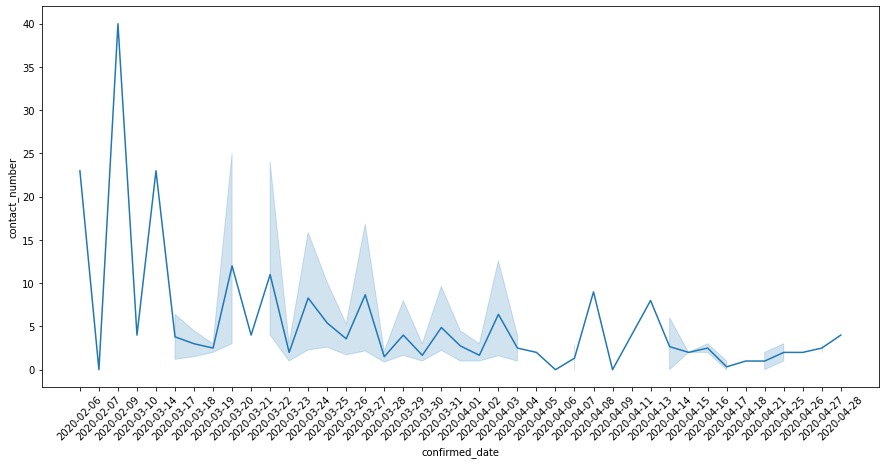

In [0]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=45)
# sns.countplot(data=sorted_p_os[sorted_p_os.confirmed_date>'2020-02-05'],x='confirmed_date',)

sns.lineplot(data= p_os[p_os.confirmed_date>'2020-02-05'],x='confirmed_date',y='contact_number')

- 2월 6일부터 4월 28일까지의 접촉자 수 평균
- 4월 1일 해외유입자 14일 필수 자가격리 정책이 시행된 이후, 해외 유입된 확진자가 접촉한 사람의 수가 줄어가는 경향을 보인다.
- 분산은 확실히 줄었다.


In [0]:
sip_pos.country.value_counts()

Korea            540
United States      6
China              5
France             1
Switzerland        1
Spain              1
Indonesia          1
Canada             1
Foreign            1
Thailand           1
Name: country, dtype: int64

In [0]:
time = pd.read_csv('Time.csv')

In [0]:
time

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0
...,...,...,...,...,...,...,...
97,2020-04-26,0,598285,578558,10728,8717,242
98,2020-04-27,0,601660,582027,10738,8764,243
99,2020-04-28,0,608514,588559,10752,8854,244
100,2020-04-29,0,614197,595129,10761,8922,246
